In [84]:
#Importing Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [85]:
# Reading the dataset
data = pd.read_csv(r'F:/cocoran/nyc-rolling-sales.csv')

In [86]:
data.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [87]:
data = data.replace(' -  ', np.nan)
data = data.replace('', np.nan)

# Converting following object type variables to Category

In [88]:
data['BUILDING CLASS AT PRESENT'] = data['BUILDING CLASS AT PRESENT'].astype('category')
data['NEIGHBORHOOD'] = data['NEIGHBORHOOD'].astype('category')
data['BUILDING CLASS CATEGORY'] = data['BUILDING CLASS CATEGORY'].astype('category')
data['TAX CLASS AT PRESENT'] = data['TAX CLASS AT PRESENT'].astype('category')
data['ADDRESS'] = data['ADDRESS'].astype('category')
data['BUILDING CLASS AT TIME OF SALE'] = data['BUILDING CLASS AT TIME OF SALE'].astype('category')


In [89]:
data['BUILDING CLASS AT PRESENT_new'] = pd.Categorical.from_array(data['BUILDING CLASS AT PRESENT']).codes
data['NEIGHBORHOOD_new'] = pd.Categorical.from_array(data['NEIGHBORHOOD']).codes
data['BUILDING CLASS CATEGORY_new'] = pd.Categorical.from_array(data['BUILDING CLASS CATEGORY']).codes
data['TAX CLASS AT PRESENT_new'] = pd.Categorical.from_array(data['TAX CLASS AT PRESENT']).codes
data['ADDRESS_new'] = pd.Categorical.from_array(data['ADDRESS']).codes
data['BUILDING CLASS AT TIME OF SALE_new'] = pd.Categorical.from_array(data['BUILDING CLASS AT TIME OF SALE']).codes

C:\Users\vidit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  """Entry point for launching an IPython kernel.
C:\Users\vidit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  
C:\Users\vidit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vidit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  after removing the cwd from sys.path.
C:\Users\vidit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  """
C:\Users\vidit\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Categorical

# Finding Correlation Matrix 

In [90]:
corr = data.corr()
corr

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT PRESENT_new,NEIGHBORHOOD_new,BUILDING CLASS CATEGORY_new,TAX CLASS AT PRESENT_new,ADDRESS_new,BUILDING CLASS AT TIME OF SALE_new
Unnamed: 0,1.000000,0.088817,0.264130,-0.031601,0.166882,-0.013318,-0.002821,-0.012856,-0.004057,0.017395,-0.028470,0.679748,0.017461,0.011124,-0.043406,-0.023952
BOROUGH,0.088817,1.000000,0.417001,-0.277848,0.256564,-0.023229,-0.005503,-0.023346,0.108303,-0.315163,-0.303971,-0.144981,-0.317936,-0.361609,0.040622,-0.311548
BLOCK,0.264130,0.417001,1.000000,-0.229118,0.234063,-0.015628,-0.003517,-0.015888,0.071262,-0.287300,-0.296627,-0.015612,-0.292885,-0.336206,-0.121320,-0.300279
LOT,-0.031601,-0.277848,-0.229118,1.000000,-0.145802,-0.034303,-0.010953,-0.033169,-0.289463,0.296680,0.657077,0.064599,0.450135,0.319449,-0.041106,0.681074
ZIP CODE,0.166882,0.256564,0.234063,-0.145802,1.000000,0.005578,0.000726,0.005415,0.330708,-0.142915,-0.148283,-0.115576,-0.163074,-0.079207,-0.043410,-0.243183
RESIDENTIAL UNITS,-0.013318,-0.023229,-0.015628,-0.034303,0.005578,1.000000,0.015653,0.888309,0.025380,-0.001074,-0.033562,-0.008771,-0.024709,0.009022,0.003751,-0.035447
COMMERCIAL UNITS,-0.002821,-0.005503,-0.003517,-0.010953,0.000726,0.015653,1.000000,0.472998,0.006428,0.049586,0.019020,-0.003299,0.030697,0.041650,0.003258,0.019494
TOTAL UNITS,-0.012856,-0.023346,-0.015888,-0.033169,0.005415,0.888309,0.472998,1.000000,0.024568,0.026429,-0.018224,-0.009389,-0.001565,0.030853,0.004766,-0.019723
YEAR BUILT,-0.004057,0.108303,0.071262,-0.289463,0.330708,0.025380,0.006428,0.024568,1.000000,-0.187609,-0.359724,-0.034196,-0.258683,-0.152360,-0.034959,-0.425983
TAX CLASS AT TIME OF SALE,0.017395,-0.315163,-0.287300,0.296680,-0.142915,-0.001074,0.049586,0.026429,-0.187609,1.000000,0.510355,0.036727,0.935198,0.932756,0.009978,0.525264


# Dropping columns wich are highly correlated to reduce multi-collinearity

In [91]:
data = data.drop(['BUILDING CLASS AT PRESENT','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','RESIDENTIAL UNITS'],axis=1)

In [92]:
data['SALE DATE'] = data['SALE DATE'].str[:10]

In [93]:
data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].str.replace('$', '').astype(float)
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].str.replace('$', '').astype(float)
data['SALE PRICE'] = data['SALE PRICE'].str.replace('$', '').astype(float)
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'])

In [94]:
#Converting Date to numeric type
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'])
data['SALE DATE'].dt.strftime('%Y%m%d')
data['SALE DATE'] = pd.to_numeric(data['SALE DATE'])

# Correlation of each variable with Target variable

In [95]:
corr = data.corr()
corr_with_SalePrice = pd.DataFrame(corr['SALE PRICE'].drop('SALE PRICE'))
corr_with_SalePrice.sort_values(by = 'SALE PRICE', ascending = False)

,SALE PRICE
GROSS SQUARE FEET,0.455423
TOTAL UNITS,0.125101
TAX CLASS AT TIME OF SALE,0.091352
TAX CLASS AT PRESENT_new,0.078972
BUILDING CLASS CATEGORY_new,0.063769
LAND SQUARE FEET,0.060183
BUILDING CLASS AT TIME OF SALE_new,0.046786
COMMERCIAL UNITS,0.046006
BUILDING CLASS AT PRESENT_new,0.044676
LOT,0.012324


# Dropping less significant variables 

In [96]:
#dropping column EASE-MENT that have no value in any row and APARTMENT NUMBER that have very few non-null values
data = data.drop(['EASE-MENT'],axis=1)
data = data.drop(['APARTMENT NUMBER'],axis=1)

In [97]:
data=data.drop(['NEIGHBORHOOD','ADDRESS','BUILDING CLASS AT TIME OF SALE'],axis=1)

In [98]:
#dropping features which have less correlation with sale price
data = data.drop(['NEIGHBORHOOD_new','ADDRESS_new','LOT','BUILDING CLASS AT PRESENT_new','BUILDING CLASS AT TIME OF SALE_new','ZIP CODE'],axis=1)

In [99]:
#dropping rows that have null value in targte variable
data = data[np.isfinite(data['SALE PRICE'])]

# Creating dummy variables for categorized features

In [100]:
data['BOROUGH'] = data['BOROUGH'].astype('category')
data['TAX CLASS AT TIME OF SALE'] = data['TAX CLASS AT TIME OF SALE'].astype('category')

In [102]:
Borough_dummies = pd.get_dummies(data['BOROUGH']).rename(columns=lambda x: 'BOROUGH_' + str(x))

In [104]:
TAX_CLASS_AT_TIME_OF_SALE_dummies = pd.get_dummies(data['TAX CLASS AT TIME OF SALE']).rename(columns=lambda x: 'TAX CLASS AT TIME OF SALE_' + str(x))

In [105]:
data = pd.concat([data, Borough_dummies,TAX_CLASS_AT_TIME_OF_SALE_dummies], axis=1)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69987 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                     69987 non-null int64
BOROUGH                        69987 non-null category
BLOCK                          69987 non-null int64
COMMERCIAL UNITS               69987 non-null int64
TOTAL UNITS                    69987 non-null int64
LAND SQUARE FEET               69987 non-null float64
GROSS SQUARE FEET              69987 non-null float64
YEAR BUILT                     69987 non-null int64
TAX CLASS AT TIME OF SALE      69987 non-null category
SALE PRICE                     69987 non-null float64
SALE DATE                      69987 non-null int64
BUILDING CLASS CATEGORY_new    69987 non-null int8
TAX CLASS AT PRESENT_new       69987 non-null int8
BOROUGH_1                      69987 non-null uint8
BOROUGH_2                      69987 non-null uint8
BOROUGH_3                      69987 non-null uint8
BOROUGH_4                      69987 non-null uin

# Handling missing values

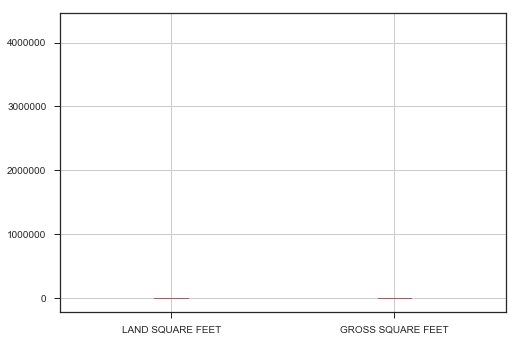

In [128]:
#Plotting boxplot to check the distribution of values and decide if the missing values be replaced by median or mean values
data.boxplot(column=['LAND SQUARE FEET','GROSS SQUARE FEET'])

In [129]:
#Replacing missing NAN values with median value
data['LAND SQUARE FEET'].fillna(data['LAND SQUARE FEET'].median(),inplace=True)
data['GROSS SQUARE FEET'].fillna(data['GROSS SQUARE FEET'].median(),inplace=True)

# Plotting pair plot

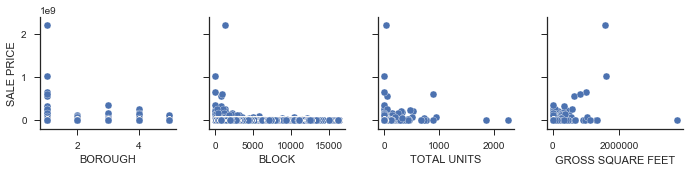

In [130]:
# Plotting pairplot to check relationship between all variables
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=data,
                  y_vars=['SALE PRICE'],
                  x_vars=['BOROUGH', 'BLOCK', 'TOTAL UNITS','GROSS SQUARE FEET'])

# Creating Train and Test Data


In [112]:
label = data['SALE PRICE']
#Dropping less significant variables
ml_data = data.drop(['SALE PRICE'], axis = 1)

In [113]:
ml_data

,Unnamed: 0,BOROUGH,BLOCK,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE DATE,...,TAX CLASS AT PRESENT_new,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5,TAX CLASS AT TIME OF SALE_1,TAX CLASS AT TIME OF SALE_2,TAX CLASS AT TIME OF SALE_3,TAX CLASS AT TIME OF SALE_4
0,4,1,392,0,5,1633.0,6440.0,1900,2,1500422400000000000,...,6,1,0,0,0,0,0,1,0,0
3,7,1,402,0,10,2272.0,6794.0,1913,2,1474588800000000000,...,7,1,0,0,0,0,0,1,0,0
4,8,1,404,0,6,2369.0,4615.0,1900,2,1479340800000000000,...,6,1,0,0,0,0,0,1,0,0
6,10,1,406,0,8,1750.0,4226.0,1920,2,1474588800000000000,...,7,1,0,0,0,0,0,1,0,0
9,13,1,387,0,24,4489.0,18523.0,1920,2,1478476800000000000,...,5,1,0,0,0,0,0,1,0,0
11,15,1,400,0,10,3717.0,12350.0,2009,2,1476662400000000000,...,7,1,0,0,0,0,0,1,0,0
12,16,1,373,0,0,2150.0,1620.0,1920,2,1473120000000000000,...,5,1,0,0,0,0,0,1,0,0
13,17,1,373,0,0,2150.0,1620.0,1920,2,1489104000000000000,...,5,1,0,0,0,0,0,1,0,0
14,18,1,373,0,0,2150.0,1620.0,1920,2,1493337600000000000,...,5,1,0,0,0,0,0,1,0,0
15,19,1,373,0,0,2150.0,1620.0,1920,2,1496966400000000000,...,5,1,0,0,0,0,0,1,0,0


In [114]:
X_train, X_test, y_train, y_test = train_test_split(ml_data, label, test_size = 0.2, random_state = 25)

# Linear Regression

In [115]:
model = LinearRegression()

In [116]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55989 entries, 34276 to 33695
Data columns (total 21 columns):
Unnamed: 0                     55989 non-null int64
BOROUGH                        55989 non-null category
BLOCK                          55989 non-null int64
COMMERCIAL UNITS               55989 non-null int64
TOTAL UNITS                    55989 non-null int64
LAND SQUARE FEET               55989 non-null float64
GROSS SQUARE FEET              55989 non-null float64
YEAR BUILT                     55989 non-null int64
TAX CLASS AT TIME OF SALE      55989 non-null category
SALE DATE                      55989 non-null int64
BUILDING CLASS CATEGORY_new    55989 non-null int8
TAX CLASS AT PRESENT_new       55989 non-null int8
BOROUGH_1                      55989 non-null uint8
BOROUGH_2                      55989 non-null uint8
BOROUGH_3                      55989 non-null uint8
BOROUGH_4                      55989 non-null uint8
BOROUGH_5                      55989 non-null u

In [117]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [118]:
model.score(X_train,y_train)

0.24472183797977276

# Random Forest Regressor

In [119]:
lr = RandomForestRegressor(n_estimators=100)

In [120]:
lr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [121]:
lr.score(X_train,y_train)

0.88282475878125111